<a href="https://colab.research.google.com/github/jackyjack00/Machine_Learning_Deep_Learning_LAB/blob/main/Es4_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron is a binary classifier, an hyperplane that divides the input space.


In [ ]:
import numpy as np

class Perceptron:
  def __init__ (self , learning_rate=0.1 , n_iter = 100):
    #hyperparameters
    self.learning_rate = learning_rate
    self.n_iter = n_iter

    #bias
    self._b = 0.0
    #weights
    self._w = None

    self._misclassified_samples = []

  #linear combination and bias
  def f(self, x:np.array) -> float:
    return np.dot( x , self._w) + self._b

  def fit( self , x:np.array , y: np.array):
    self._b = 0.0
    self._w = np.zeros( x.shape[1] )
    self._misclassified_samples = []

    #for the number of iterations decided
    for _ in range(self.n_iter):
      errors = 0
      #for each sample
      for xi , yi in zip(x,y):
        #compute the update using the specified learning rate times the error
        update = self.learning_rate * ( yi - self.predict(xi) )
        self._b += update
        self._w += update*xi
        errors += int (update != 0.0)
        
      self._misclassified_samples.append(errors)

  def predict( self , x:np.array) -> int:
    return np.where( self.f(x) >= 0.0 , 1 , 0)

In [ ]:
from sklearn.datasets import load_iris

X , y = load_iris( return_X_y=True)


Use only the first 2 features, and use only the first two classes

In [ ]:
reduced_x = []
reduced_y = []
for xi , yi in zip(X , y):
  if yi < 2:
    reduced_x.append(xi[:2])
    reduced_y.append(yi)

reduced_x = np.array(reduced_x)
reduced_y = np.array(reduced_y)

divide in split [5 , 2 , 3] as [train , val , test]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split( reduced_x , reduced_y , train_size = .7)
x_train , x_val, y_train, y_val = train_test_split( x_train , y_train , train_size = .7)

In [ ]:
print( x_train.shape , x_val.shape , x_test.shape)

(49, 2) (21, 2) (30, 2)


Fit the Perceptron

In [ ]:
clf = Perceptron(n_iter = 10000)
clf.fit( x_train , y_train )
y_pred = clf.predict( x_train )
print( accuracy_score(y_train , y_pred) )

1.0


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict( x_val )
print( accuracy_score(y_val , y_pred) )

1.0


In [ ]:
clf = Perceptron( learning_rate=0.5 , n_iter = 10000)
clf.fit( x_train , y_train )
y_pred = clf.predict( x_train )
print( accuracy_score(y_train , y_pred) )

1.0


In [ ]:
y_pred = clf.predict( x_val )
print( accuracy_score(y_val , y_pred) )

1.0


In [ ]:
clf = Perceptron( learning_rate=0.01 , n_iter = 10000)
clf.fit( x_train , y_train )
y_pred = clf.predict( x_train )
print( accuracy_score(y_train , y_pred) )

1.0


In [ ]:
y_pred = clf.predict( x_val )
print( accuracy_score(y_val , y_pred) )

1.0


Use the test set

In [ ]:
y_pred = clf.predict( x_test ) 
print( accuracy_score( y_test , y_pred ) )

0.9333333333333333


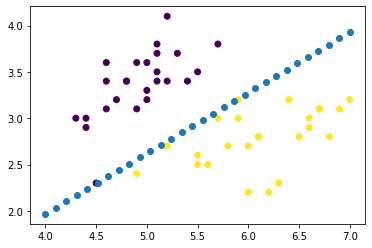

In [ ]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
plt.scatter(x_train[:,0], x_train[:,1] , c = y_train)
domain = np.linspace(4 , 7 , 30)
plt.scatter( domain , -(clf._b + clf._w[0]*domain)/clf._w[1] )
